In [31]:
from underthesea import word_tokenize, text_normalize

from pyvi import ViTokenizer
from pyvi.ViTokenizer import tokenize
import pandas as pd
import re
import string

import pandas as pd

# Text processing

In [32]:
def clean_text(text):
    text = re.sub(
        r"[\.,\(\)]", " ", text
    )  # thay thế các kí tự đặc biệt bằng khoảng trắng
    text = re.sub(
        r"…", " ", text
    )  # thay thế các kí tự đặc biệt bằng khoảng trắng
    text = re.sub('<.*?>', '', text).strip() # remove html tag
    # Remove special characters
    # text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub('(\s)+', r'\1', text)
    return text

def sentence_segment(text):
    sents = re.split("([.?!])?[\n]+|[.?!] ", text)
    return sents

def word_segment(sent): # chuyển câu thành từ
    sent = tokenize(sent)
    sent = text_normalize(sent)
    return sent

def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
    return text.lower()


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_numbers(text_in):
  for ele in text_in.split(): 
    if ele.isdigit():
        text_in = text_in.replace(ele, "@")
  for character in text_in:
    if character.isdigit():
        text_in = text_in.replace(character, "@")
  return text_in


def remove_special_characters(text):
  chars = re.escape(string.punctuation)
  return re.sub(r'['+chars+']', '', text)

 
def preprocess(text_in):  
    text = clean_text(text_in)
    text = remove_special_characters(text)
    text = remove_numbers(text) 
    return text

data_stopwords = pd.read_csv('./stopwords.csv')
list_stopwords = data_stopwords['stopwords'].values.tolist()
def remove_stopword(text):
    text = ' '.join([i for i in text.split() if i not in list_stopwords])
    return text

def process_text(text):
    text = clean_text(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = word_segment(text)
    text = normalize_text(text)
    text = remove_stopword(text)
    return text

In [33]:
import re
s = "string. With. Punctuation?"
s = re.sub(r'[^\w\s]','',s)


In [34]:
print(word_tokenize("hôm nay . trời đẹp. lắm", format='text'))

hôm_nay . trời đẹp . lắm


In [35]:
import underthesea
print(process_text("hôm nay… trời đẹp. lắm"))

hôm_nay trời đẹp lắm


# Load Docx

In [36]:
from langchain_core import document_loaders

In [61]:
from langchain_community.document_loaders import Docx2txtLoader
file_path = "./DU THAO ND DAU GIA KS FINAL 26FINAL CPTN.DOCX"
loader = Docx2txtLoader(file_path)

data = loader.load()

data

[Document(page_content='21\n\n\n\nCHÍNH PHỦ\n\n\n\n\nSố:         /2024/NĐ-CP\n\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc \n\n\n                   Hà Nội, ngày      tháng     năm 2024          \n\n\n\nDỰ THẢO 4\n\nDỰ THẢO 4\n\n\n\nNGHỊ ĐỊNH\n\nQuy định chi tiết một số điều của Luật Viễn thông về quản lý kho số viễn thông, tài nguyên Internet, việc bồi thường khi nhà nước thu hồi mã, số viễn thông, tài nguyên Internet; đấu giá quyền sử dụng mã, số viễn thông, tên miền quốc gia Việt Nam ".vn"\n\n\n\nCăn cứ Luật Tổ chức Chính phủ ngày 19 tháng 6 năm 2015; Luật sửa đổi, bổ sung một số điều của Luật Tổ chức Chính phủ và Luật Tổ chức chính quyền địa phương ngày 22 tháng 11 năm 2019;\n\nCăn cứ Luật Viễn thông ngày 24 tháng 11 năm 2023;\n\nCăn cứ Luật Đấu giá tài sản ngày 17 tháng 11 năm 2016;\n\nCăn cứ Luật Quản lý, sử dụng tài sản công ngày 21 tháng 6 năm 2017;\n\nTheo đề nghị của Bộ trưởng Bộ Thông tin và Truyền thông;\n\nChính phủ ban hành Nghị định quy định chi tiết 

In [66]:
most_common = file_path[2:-5] + "_most_common" + ".csv"
tfidftranformer_important_words = file_path[2:-5] + "_tfidftranformer_important_words" + ".csv"
tfidfvectorizer_important_words = file_path[2:-5] + "_tfidfvectorizer_important_words" + ".csv"
most_common

'DU THAO ND DAU GIA KS FINAL 26FINAL CPTNmost_common.csv'

In [38]:
df = data[0].page_content
df

'21\n\n\n\nCHÍNH PHỦ\n\n\n\n\nSố:         /2024/NĐ-CP\n\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc \n\n\n                   Hà Nội, ngày      tháng     năm 2024          \n\n\n\nDỰ THẢO 4\n\nDỰ THẢO 4\n\n\n\nNGHỊ ĐỊNH\n\nQuy định chi tiết một số điều của Luật Viễn thông về quản lý kho số viễn thông, tài nguyên Internet, việc bồi thường khi nhà nước thu hồi mã, số viễn thông, tài nguyên Internet; đấu giá quyền sử dụng mã, số viễn thông, tên miền quốc gia Việt Nam ".vn"\n\n\n\nCăn cứ Luật Tổ chức Chính phủ ngày 19 tháng 6 năm 2015; Luật sửa đổi, bổ sung một số điều của Luật Tổ chức Chính phủ và Luật Tổ chức chính quyền địa phương ngày 22 tháng 11 năm 2019;\n\nCăn cứ Luật Viễn thông ngày 24 tháng 11 năm 2023;\n\nCăn cứ Luật Đấu giá tài sản ngày 17 tháng 11 năm 2016;\n\nCăn cứ Luật Quản lý, sử dụng tài sản công ngày 21 tháng 6 năm 2017;\n\nTheo đề nghị của Bộ trưởng Bộ Thông tin và Truyền thông;\n\nChính phủ ban hành Nghị định quy định chi tiết một số điều của Luật Vi

In [39]:
df = process_text(df)
df

'chính_phủ số nđcp cộng hòa xã_hội chủ_nghĩa việt_nam độc_lập tự_do hạnh_phúc hà_nội dự_thảo dự_thảo nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam_vn căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông căn_cứ luật_đấu_giá tài_sản căn_cứ luật quản_lý tài_sản công đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam_vn chương_i quy_định phạm_vi điều_chỉnh nghị_định quy_định chi_tiết khoản khoản luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên intern

In [40]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Word cloud

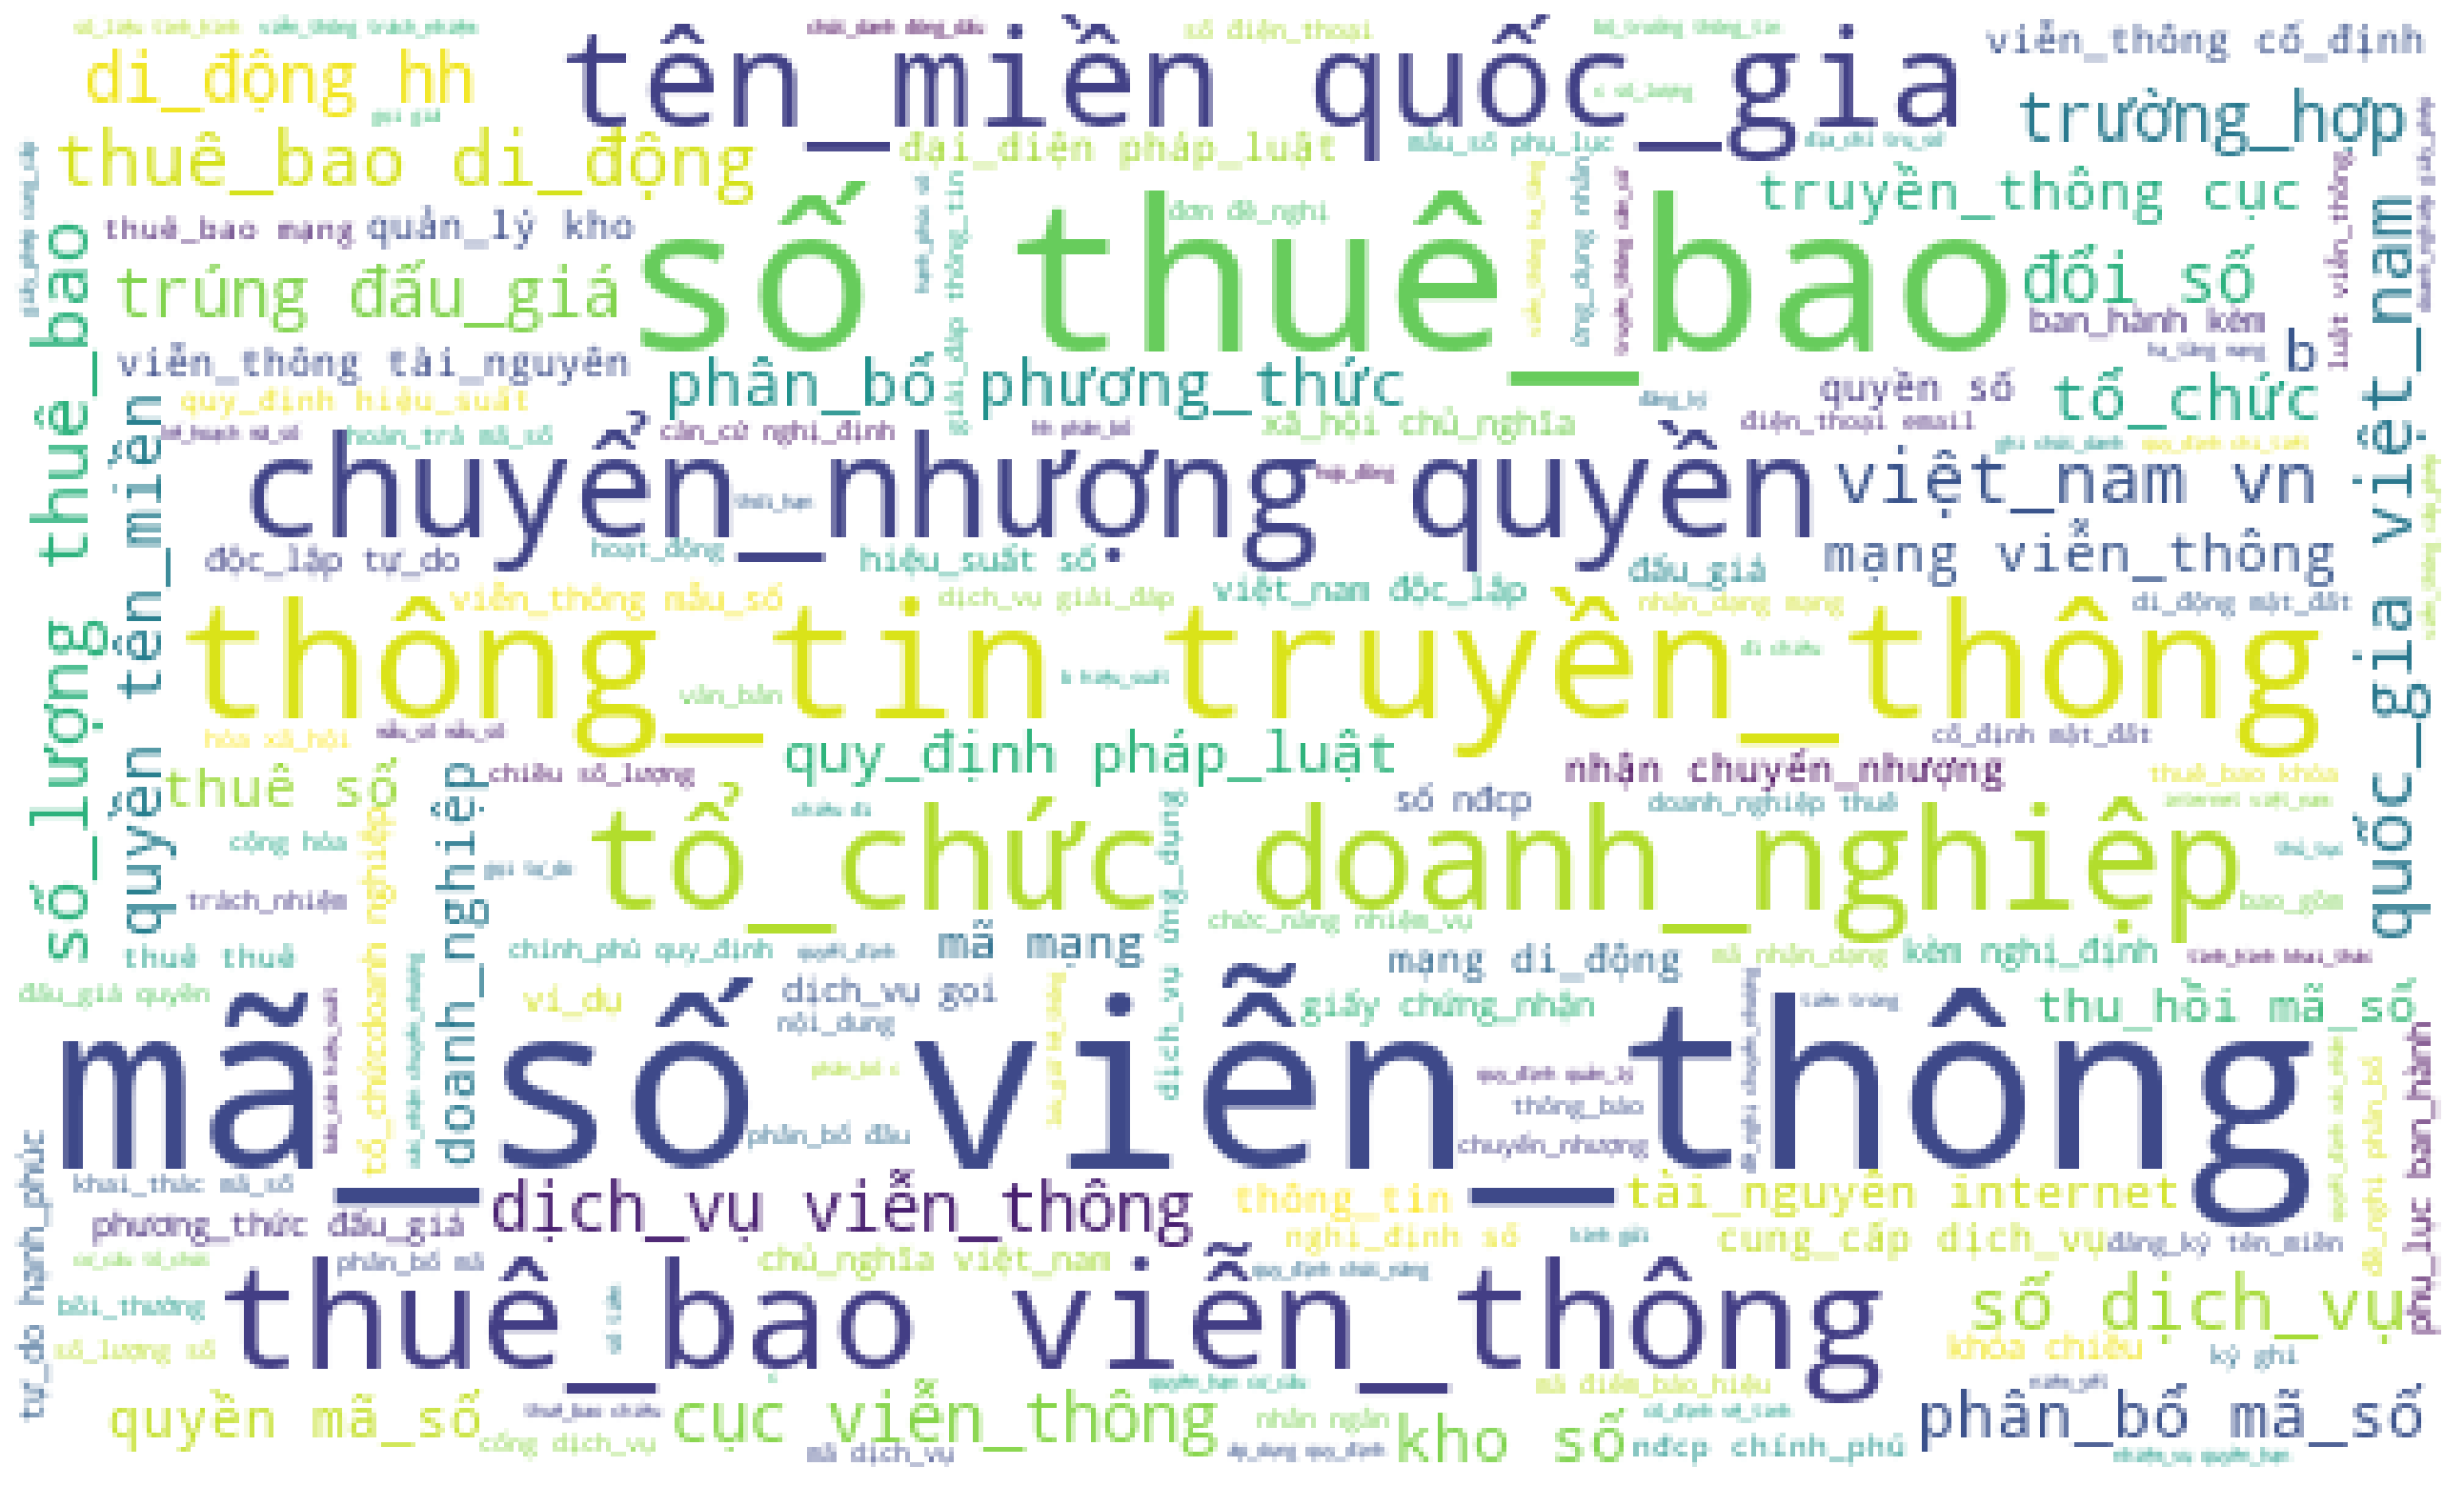

In [41]:
texto = df

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Frequence

In [42]:
from nltk.probability import FreqDist

In [43]:
fdist = FreqDist(word.lower() for word in word_tokenize(df))


In [44]:
fdist.most_common(20)

[('viễn_thông', 820),
 ('số', 663),
 ('thuê_bao', 403),
 ('mã_số', 384),
 ('phân_bổ', 268),
 ('dịch_vụ', 251),
 ('doanh_nghiệp', 250),
 ('thông_tin', 248),
 ('chuyển_nhượng', 232),
 ('quy_định', 198),
 ('tổ_chức', 194),
 ('đấu_giá', 185),
 ('quyền', 177),
 ('tên_miền', 157),
 ('di_động', 154),
 ('truyền_thông', 148),
 ('số_lượng', 141),
 ('việt_nam', 137),
 ('thuê', 115),
 ('quốc_gia', 112)]

In [45]:
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)
df_fdist.to_csv(most_common, encoding='utf8')

           Frequency
Term                
chính_phủ         36
số               663
nđcp              31
cộng              27
hòa               26
...              ...
đóng               2
dấuký              2
pháp_nhân          2
lưu_ý              1
bắt_buộc           1

[804 rows x 1 columns]


In [46]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
df

'chính_phủ số nđcp cộng hòa xã_hội chủ_nghĩa việt_nam độc_lập tự_do hạnh_phúc hà_nội dự_thảo dự_thảo nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam_vn căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông căn_cứ luật_đấu_giá tài_sản căn_cứ luật quản_lý tài_sản công đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam_vn chương_i quy_định phạm_vi điều_chỉnh nghị_định quy_định chi_tiết khoản khoản luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên intern

In [48]:
dt = data[0].page_content

In [49]:
from underthesea import sent_tokenize

# TF-IDF transformer

In [50]:
da = sent_tokenize(dt)
da = [process_text(i) for i in da]
da = [i for i in da if i != '']
da

['chính_phủ số nđcp cộng hòa xã_hội chủ_nghĩa việt_nam độc_lập tự_do hạnh_phúc hà_nội dự_thảo dự_thảo nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam_vn căn_cứ luật tổ_chức chính_phủ luật sửa_đổi bổ_sung luật tổ_chức chính_phủ luật tổ_chức chính_quyền địa_phương căn_cứ luật viễn_thông căn_cứ luật_đấu_giá tài_sản căn_cứ luật quản_lý tài_sản công đề_nghị bộ_trưởng thông_tin truyền_thông chính_phủ ban_hành nghị_định quy_định chi_tiết luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguyên internet_đấu_giá quyền mã_số viễn_thông tên_miền quốc_gia việt_nam vn',
 'chương_i quy_định',
 'phạm_vi điều_chỉnh nghị_định quy_định chi_tiết khoản khoản luật viễn_thông quản_lý kho số viễn_thông tài_nguyên internet bồi_thường_khi nhà_nước thu_hồi mã_số viễn_thông tài_nguy

In [51]:
cv=CountVectorizer()

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(da)

In [52]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
tfidf_transformer.idf_

array([5.5678144 , 6.66642669, 6.26096158, 6.66642669, 5.5678144 ,
       6.26096158, 6.66642669, 5.5678144 , 6.26096158, 3.80422581,
       5.05698878, 6.66642669, 4.063737  , 5.5678144 , 5.97327951,
       6.66642669, 4.87466722, 6.66642669, 6.66642669, 3.38928196,
       6.26096158, 6.26096158, 5.5678144 , 6.26096158, 6.66642669,
       4.79462451, 6.66642669, 6.66642669, 5.75013596, 4.87466722,
       4.10147733, 6.26096158, 6.66642669, 6.66642669, 4.87466722,
       6.26096158, 5.97327951, 6.66642669, 6.26096158, 4.58698515,
       4.52636052, 5.97327951, 4.52636052, 6.66642669, 5.5678144 ,
       4.14069804, 5.97327951, 5.5678144 , 5.97327951, 6.66642669,
       6.66642669, 4.79462451, 6.66642669, 4.22407965, 2.79522568,
       4.79462451, 5.05698878, 4.52636052, 6.66642669, 6.26096158,
       5.28013233, 5.75013596, 6.66642669, 6.66642669, 6.66642669,
       5.97327951, 4.79462451, 5.75013596, 5.75013596, 6.66642669,
       5.75013596, 6.66642669, 5.16234929, 3.92558666, 4.52636

In [53]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'])

,idf_weights
viễn_thông,1.679401
số,1.795053
mã_số,2.107300
phân_bổ,2.139218
doanh_nghiệp,2.200519
...,...
tp,6.666427
to,6.666427
tm,6.666427
trung,6.666427


# Result TF-IDF transformer

In [54]:
count_vector=cv.transform(da)
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names_out()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.580689
chính_phủ,0.282532
căn_cứ,0.266438
viễn_thông,0.235861
tài_nguyên,0.229122
...,...
khai_thác,0.000000
khiếu_kiện,0.000000
khiếu_nại,0.000000
khoản,0.000000


In [55]:
df.to_csv(tfidftranformer_important_words, encoding='utf8')

# TF-IDF Vectorizer

In [56]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(da)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [57]:
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.580689
chính_phủ,0.282532
căn_cứ,0.266438
viễn_thông,0.235861
tài_nguyên,0.229122
...,...
khai_thác,0.000000
khiếu_kiện,0.000000
khiếu_nại,0.000000
khoản,0.000000


# Result TF-IDF Vectorizer

In [58]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(da)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(da)

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
df2 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df2.sort_values(by=["tfidf"],ascending=False)

,tfidf
luật,0.580689
chính_phủ,0.282532
căn_cứ,0.266438
viễn_thông,0.235861
tài_nguyên,0.229122
...,...
khai_thác,0.000000
khiếu_kiện,0.000000
khiếu_nại,0.000000
khoản,0.000000


In [59]:
df2.to_csv(tfidfvectorizer_important_words, encoding='utf8')